In [1]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import tensorflow as tf

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
labels = {}
count = 0
with open(r"C:\Users\PC\OneDrive\Pulpit\psl\text\labels.txt", "r") as file_labels:
    for line in file_labels:
        labels[line[:-1]] = count
        count += 1

In [4]:
X_train_base = {}
file_labels = open(r"C:\Users\PC\OneDrive\Pulpit\psl\text\labels.txt", "r")
count = 0
for line in file_labels:
    X_train_base[line[:-1]] = []

file_labels.close()

In [5]:
X_test_base = {}
file_labels = open(r"C:\Users\PC\OneDrive\Pulpit\psl\text\labels.txt", "r")
count = 0
for line in file_labels:
    X_test_base[line[:-1]] = []

file_labels.close()

In [6]:
files = open(r"C:\Users\PC\OneDrive\Pulpit\psl\text\files_to_test.txt", "r")

In [7]:
names_base = {}
file_labels = open(r"C:\Users\PC\OneDrive\Pulpit\psl\text\labels.txt", "r")
for line in file_labels:
    names_base[line[:-1]] = []

file_labels.close()

for line in files:
    splited = line.split(" - ")
    names_base[splited[0]] = int(splited[1])

In [8]:
files.close()

In [9]:
fp = open(r"C:\Users\PC\OneDrive\Pulpit\psl\text\distance_complex.txt", "r")

In [10]:
for line in fp:
    splited = line.split(", ")
    temp = []

    for x in range(1035):
        temp.append(float(splited[x]))

    name = splited[-1].split("_")
    print(splited[1036][:-5])
    if names_base[splited[1036].split("_")[0]] >= int(splited[1036][:-5].split("_")[1]):
        X_test_base[name[0]].append(temp)
    else:
        X_train_base[name[0]].append(temp)

fp.close()

0$o_0
0$o_1
0$o_10
0$o_100
0$o_1000
0$o_1001
0$o_1002
0$o_1003
0$o_1004
0$o_1005
0$o_1006
0$o_1007
0$o_1008
0$o_1009
0$o_101
0$o_1010
0$o_1011
0$o_1012
0$o_1013
0$o_1014
0$o_1015
0$o_1016
0$o_1017
0$o_1018
0$o_1019
0$o_102
0$o_1020
0$o_1021
0$o_1022
0$o_1023
0$o_1024
0$o_1025
0$o_1026
0$o_1027
0$o_1028
0$o_1029
0$o_103
0$o_1030
0$o_1031
0$o_1032
0$o_1033
0$o_1034
0$o_1035
0$o_1036
0$o_1037
0$o_1038
0$o_1039
0$o_104
0$o_1040
0$o_1041
0$o_1042
0$o_1043
0$o_1044
0$o_1045
0$o_1046
0$o_1047
0$o_1048
0$o_1049
0$o_105
0$o_1050
0$o_1051
0$o_1052
0$o_1053
0$o_1054
0$o_1055
0$o_1056
0$o_1057
0$o_1058
0$o_1059
0$o_106
0$o_1060
0$o_1061
0$o_1062
0$o_1063
0$o_1064
0$o_1065
0$o_1066
0$o_1067
0$o_1068
0$o_1069
0$o_107
0$o_1070
0$o_1071
0$o_1072
0$o_1073
0$o_1074
0$o_1075
0$o_1076
0$o_1077
0$o_1078
0$o_1079
0$o_108
0$o_1080
0$o_1081
0$o_1082
0$o_1083
0$o_1084
0$o_1085
0$o_1086
0$o_1087
0$o_1088
0$o_1089
0$o_109
0$o_1090
0$o_1091
0$o_1092
0$o_1093
0$o_1094
0$o_1095
0$o_1096
0$o_1097
0$o_1098
0$o_1099
0

In [11]:
X_train = []
X_test = []
y_train = []
y_test = []

In [12]:
count = 0
for key in X_train_base.keys():
    for value in X_train_base[key]:
        to_y = [0 for _ in range(27)]
        X_train.append(value)
        to_y[count] = 1
        y_train.append(to_y)
    count += 1

count = 0
for key in X_test_base.keys():
    for value in X_test_base[key]:
        to_y = [0 for _ in range(27)]
        X_test.append(value)
        to_y[count] = 1
        y_test.append(to_y)
    count += 1

In [13]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [14]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
import joblib

joblib.dump(scaler, "scaler_final.save")

['scaler_final.save']

In [15]:
import tensorflow.keras as keras
checkpoint = keras.callbacks.ModelCheckpoint("best_model3.h5", monitor='loss', verbose=2, save_best_only=True, save_weights_only=False, mode='auto', save_freq = "epoch")

In [16]:
model = Sequential()
model.add(Dense(1035, input_dim=1035, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(27, activation="softmax"))

In [17]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adamax(learning_rate=1e-4), metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=4000, batch_size=512, verbose=2, callbacks=checkpoint)

Epoch 1/4000

Epoch 1: loss improved from inf to 3.41697, saving model to best_model3.h5
120/120 - 2s - loss: 3.4170 - accuracy: 0.0406 - 2s/epoch - 14ms/step
Epoch 2/4000

Epoch 2: loss improved from 3.41697 to 3.32352, saving model to best_model3.h5
120/120 - 1s - loss: 3.3235 - accuracy: 0.0454 - 501ms/epoch - 4ms/step
Epoch 3/4000

Epoch 3: loss improved from 3.32352 to 3.28610, saving model to best_model3.h5
120/120 - 1s - loss: 3.2861 - accuracy: 0.0552 - 956ms/epoch - 8ms/step
Epoch 4/4000

Epoch 4: loss improved from 3.28610 to 3.25797, saving model to best_model3.h5
120/120 - 1s - loss: 3.2580 - accuracy: 0.0624 - 500ms/epoch - 4ms/step
Epoch 5/4000

Epoch 5: loss improved from 3.25797 to 3.22262, saving model to best_model3.h5
120/120 - 0s - loss: 3.2226 - accuracy: 0.0754 - 488ms/epoch - 4ms/step
Epoch 6/4000

Epoch 6: loss improved from 3.22262 to 3.19124, saving model to best_model3.h5
120/120 - 0s - loss: 3.1912 - accuracy: 0.0856 - 488ms/epoch - 4ms/step
Epoch 7/4000

Ep

In [15]:
from tensorflow.keras.models import load_model
model = load_model("best_model2.h5")

In [16]:
model.evaluate(X_test, y_test)

412/412 [==============================] - 2s 2ms/step - loss: 0.4438 - accuracy: 0.9565


[0.44379138946533203, 0.9565349221229553]

In [29]:
y_pred = model.predict(X_test)

412/412 [==============================] - 1s 2ms/step


In [30]:
count = 0
for x in range(y_pred.shape[0]):
    if np.where(y_pred[x] == np.amax(y_pred[x])) == np.where(y_test[x] == np.amax(y_test[x])):
        count += 1

In [31]:
print("Accuracy for test data is:", count/(y_pred.shape[0]))

Accuracy for test data is: 0.9565349313509823


In [21]:
import joblib

In [22]:
scaler_ost = joblib.load("scaler_for_ost.h5")

In [71]:
print(np.where(y_pred[1] == np.amax(y_pred[1]))[0][0])

19


In [23]:
model_ost = load_model("best_model_ost.h5")

In [24]:
import copy
X_test_copy = copy.deepcopy(X_test)

In [25]:
X_test_copy = scaler.inverse_transform(X_test_copy)

In [26]:
X_test_copy = scaler_ost.transform(X_test_copy)

In [28]:
predict_ost = model_ost.predict(X_test_copy)

412/412 [==============================] - 1s 2ms/step


In [29]:
count = 0
for x in range(y_pred.shape[0]):
    if np.where(y_pred[x] == np.amax(y_pred[x]))[0][0] in [0, 19, 20]:
        if np.where(predict_ost[x] == np.amax(predict_ost[x]))[0][0] == 0:
            to_pred = [0 for _ in range(27)]
            to_pred[0] += 1
            y_pred[x] = copy.deepcopy(to_pred)
        elif np.where(predict_ost[x] == np.amax(predict_ost[x]))[0][0] == 1:
            to_pred = [0 for _ in range(27)]
            to_pred[19] += 1
            y_pred[x] = copy.deepcopy(to_pred)
        else:
            to_pred = [0 for _ in range(27)]
            to_pred[20] += 1
            y_pred[x] = copy.deepcopy(to_pred)

    if np.where(y_pred[x] == np.amax(y_pred[x])) == np.where(y_test[x] == np.amax(y_test[x])):
        count += 1

In [30]:
print("Accuracy for test data is:", count/(y_pred.shape[0]))

Accuracy for test data is: 0.9451566411287264


In [21]:
model.save("new_complex.h5")

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

In [33]:
y_test_int = []
y_pred_int = []

In [34]:
for x in range(y_pred.shape[0]):
    y_test_int.append(np.where(y_test[x] == np.amax(y_test[x]))[0][0])
    y_pred_int.append(np.where(y_pred[x] == np.amax(y_pred[x]))[0][0])

In [35]:
cm = confusion_matrix(y_test_int, y_pred_int)

In [36]:
lab = [key for key in labels]

In [37]:
lab[22] = r"to.jest.(wzgledem.rzeczy)\$on\$ona"

In [38]:
cm_df = pd.DataFrame(cm,
                     index=lab,
                     columns=lab)

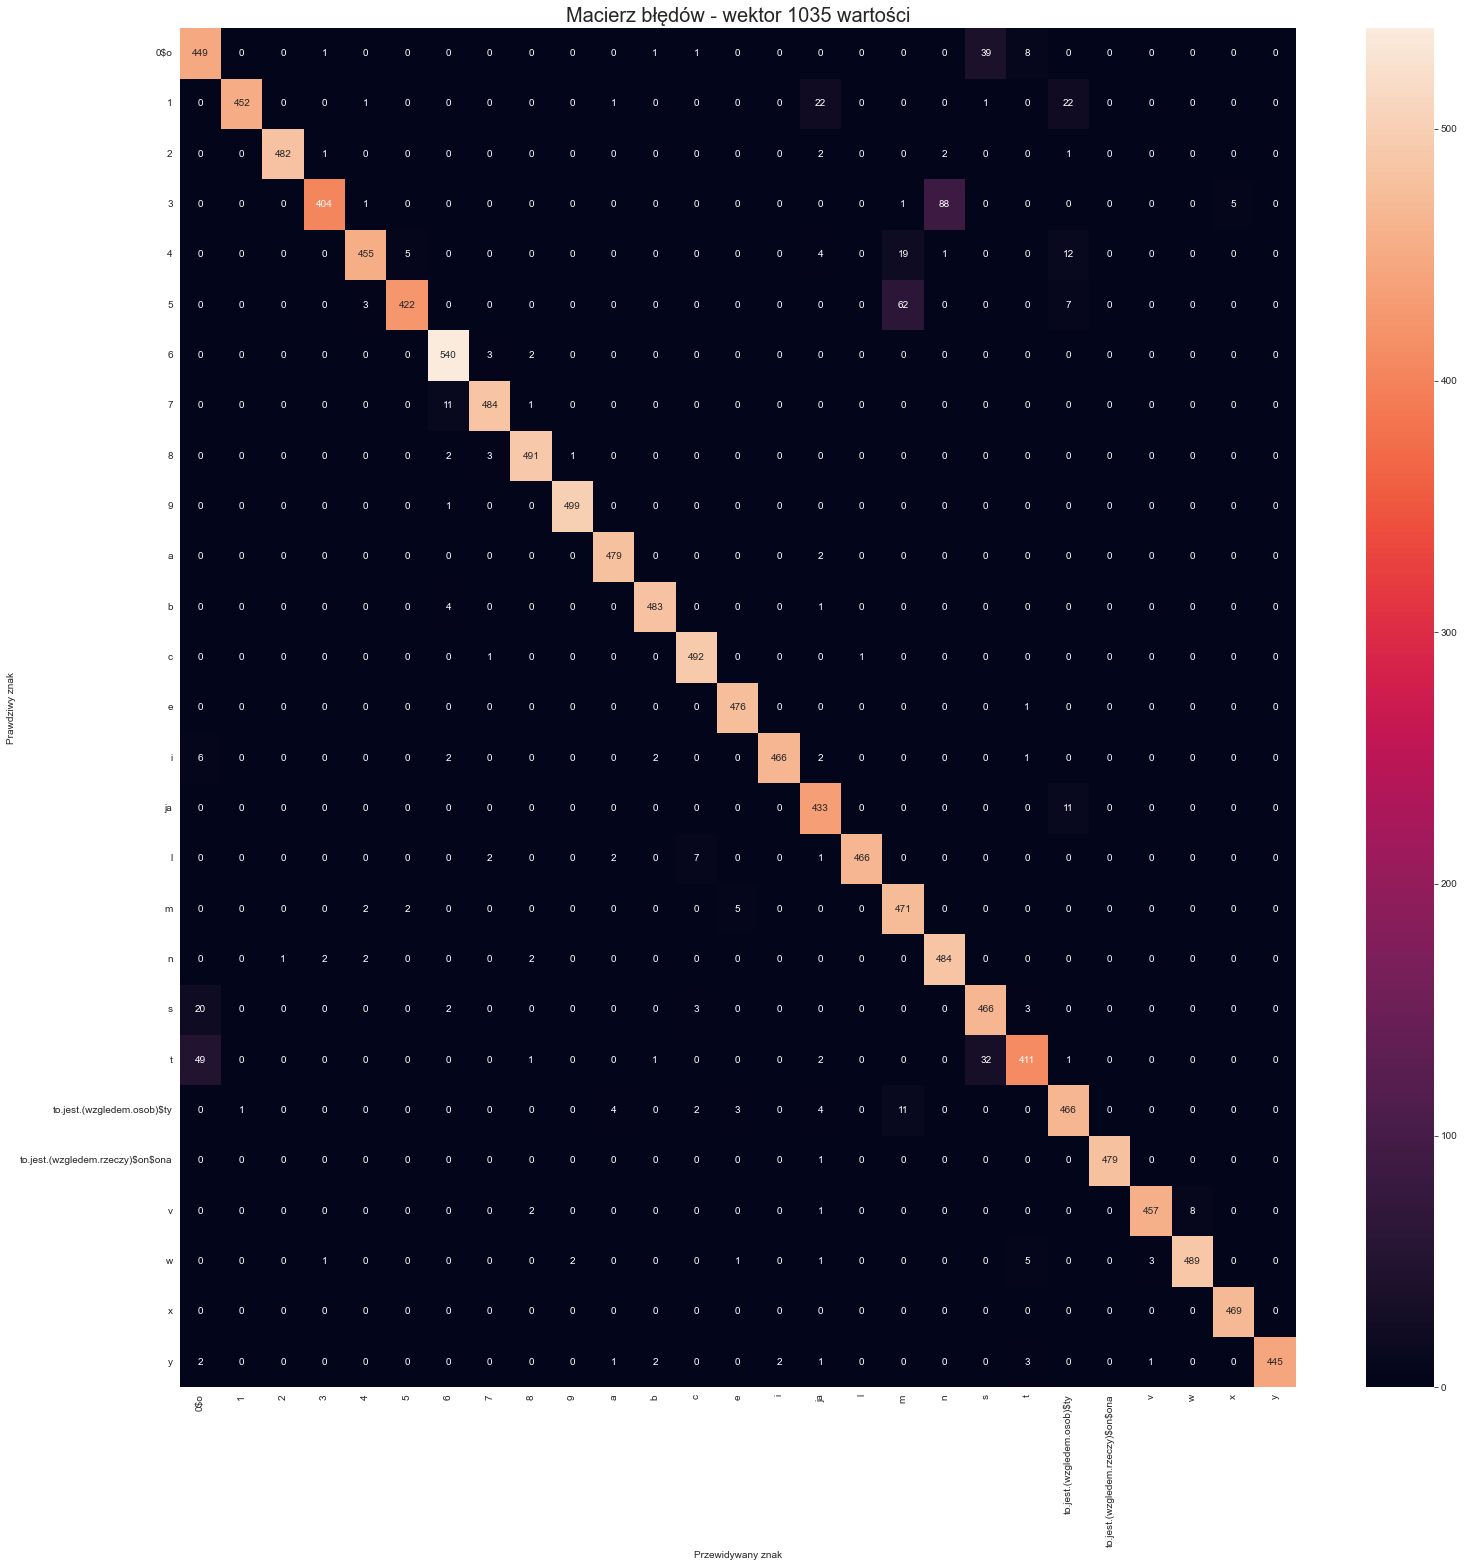

In [39]:
import seaborn as sns

fig = plt.figure(figsize=(25,25))
sns.heatmap(cm_df, annot=True, fmt='.3g')
plt.rc('font', size = 10)
plt.rc('axes', labelsize = 10)
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=1)
plt.title('Macierz błędów - wektor 1035 wartości', fontsize=20)
plt.ylabel('Prawdziwy znak')
plt.xlabel('Przewidywany znak')
plt.show()
fig.savefig("confusion_matrix.png")

In [33]:
file = open("labels.txt", "r")
name = []
for line in file:
    name.append(line[:-1])

file.close()

In [47]:
for sign in range(27):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for x in range(len(y_pred_int)):
        if y_pred_int[x] == sign and y_test_int[x] == sign:
            TP += 1
        elif y_pred_int[x] != sign and y_test_int[x] != sign:
            TN += 1
        elif y_pred_int[x] == sign and y_test_int[x] != sign:
            FP += 1
        else:
            FN += 1

    #print(name[sign]+" - precision: "+str(TP/(TP+FP)))
    print(name[sign]+" - recall: "+str(TP/(TP+FN)))
    #print(name[sign]+" - accuracy: "+str((TP+TN)/(TP+TN+FP+FN)))

0$o - recall: 0.9579158316633266
1 - recall: 0.8376753507014028
2 - recall: 0.9836065573770492
3 - recall: 0.9178356713426854
4 - recall: 0.8830645161290323
5 - recall: 0.9392712550607287
6 - recall: 0.9908256880733946
7 - recall: 0.9778225806451613
8 - recall: 0.9879275653923542
9 - recall: 0.996
a - recall: 0.9958419958419958
b - recall: 0.9918032786885246
c - recall: 0.9939271255060729
e - recall: 0.9957983193277311
i - recall: 0.9812108559498957
ja - recall: 0.9730337078651685
l - recall: 0.9665271966527197
m - recall: 0.89375
n - recall: 0.714867617107943
s - recall: 0.8511066398390342
t - recall: 0.7459677419354839
to.jest.(wzgledem.osob)$ty - recall: 0.9592668024439919
to.jest.(wzgledem.rzeczy)$on$ona - recall: 0.99375
v - recall: 0.9829059829059829
w - recall: 0.954183266932271
x - recall: 1.0
y - recall: 0.9649890590809628


In [47]:
X_test_zero = []
X_train_zero = []
y_test_zero = []
y_train_zero = []

In [48]:
count = 0
for x in ["0$o", "s", "t"]:
    for value in X_train_base[x]:
        to_y = [0, 0, 0]
        X_train_zero.append(value)
        to_y[count] = 1
        y_train_zero.append(to_y)
    count += 1

count = 0
count_all = 0
for x in ["0$o", "s", "t"]:
    for value in X_test_base[x]:
        to_y = [0, 0, 0]
        X_test_zero.append(value)
        to_y[count] = 1
        y_test_zero.append(to_y)
        count_all += 1
    count += 1

In [49]:
count_all

1490

In [13]:
scaler_to_zero = MinMaxScaler().fit(X_test_zero)

In [34]:
X_test_zero = scaler_ost.transform(X_test_zero)

In [35]:
X_train_zero = scaler_ost.transform(X_train_zero)

In [36]:
X_train_zero = np.array(X_train_zero)
X_test_zero = np.array(X_test_zero)
y_train_zero = np.array(y_train_zero)
y_test_zero = np.array(y_test_zero)

In [17]:
model_for_zero = Sequential()

In [18]:
model_for_zero.add(Dense(1035, input_dim=1035, activation="relu"))
model_for_zero.add(Dropout(0.5))
model_for_zero.add(Dense(256, activation="relu"))
model_for_zero.add(Dropout(0.5))
model_for_zero.add(Dense(64, activation="relu"))
model_for_zero.add(Dropout(0.5))
model_for_zero.add(Dense(3, activation="softmax"))

In [19]:
model_for_zero.compile(loss="categorical_crossentropy", optimizer='adamax', metrics=['accuracy'])

In [20]:
model_for_zero.fit(X_train_zero, y_train_zero, epochs=5000, batch_size=128, verbose=2)

Epoch 1/5000
48/48 - 2s - loss: 1.1777 - accuracy: 0.3367 - 2s/epoch - 43ms/step
Epoch 2/5000
48/48 - 0s - loss: 1.1068 - accuracy: 0.3525 - 170ms/epoch - 4ms/step
Epoch 3/5000
48/48 - 0s - loss: 1.1045 - accuracy: 0.3483 - 259ms/epoch - 5ms/step
Epoch 4/5000
48/48 - 0s - loss: 1.1008 - accuracy: 0.3623 - 194ms/epoch - 4ms/step
Epoch 5/5000
48/48 - 0s - loss: 1.0951 - accuracy: 0.3613 - 157ms/epoch - 3ms/step
Epoch 6/5000
48/48 - 0s - loss: 1.0780 - accuracy: 0.4093 - 149ms/epoch - 3ms/step
Epoch 7/5000
48/48 - 0s - loss: 1.0523 - accuracy: 0.4507 - 151ms/epoch - 3ms/step
Epoch 8/5000
48/48 - 0s - loss: 0.9796 - accuracy: 0.5404 - 162ms/epoch - 3ms/step
Epoch 9/5000
48/48 - 0s - loss: 0.8780 - accuracy: 0.6110 - 152ms/epoch - 3ms/step
Epoch 10/5000
48/48 - 0s - loss: 0.7712 - accuracy: 0.6760 - 154ms/epoch - 3ms/step
Epoch 11/5000
48/48 - 0s - loss: 0.6836 - accuracy: 0.7174 - 150ms/epoch - 3ms/step
Epoch 12/5000
48/48 - 0s - loss: 0.5991 - accuracy: 0.7725 - 153ms/epoch - 3ms/step
Epo

In [37]:
y_pred_zero = model_ost.predict(X_test_zero)

47/47 [==============================] - 0s 3ms/step


In [38]:
count = 0
for x in range(y_pred_zero.shape[0]):
    if np.where(y_pred_zero[x] == np.amax(y_pred_zero[x])) == np.where(y_test_zero[x] == np.amax(y_test_zero[x])):
        count += 1

In [39]:
print("Accuracy for test data is:", count/y_pred_zero.shape[0])

Accuracy for test data is: 0.87248322147651


In [40]:
y_test_int_zero = []
y_pred_int_zero = []

In [41]:
for x in range(y_pred_zero.shape[0]):
    y_test_int_zero.append(np.where(y_test_zero[x] == np.amax(y_test_zero[x]))[0][0])
    y_pred_int_zero.append(np.where(y_pred_zero[x] == np.amax(y_pred_zero[x]))[0][0])

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

In [43]:
cm = confusion_matrix(y_test_int_zero, y_pred_int_zero)

In [44]:
cm_df = pd.DataFrame(cm,
                     index=["0$o", "s", "t"],
                     columns=["0$o", "s", "t"])

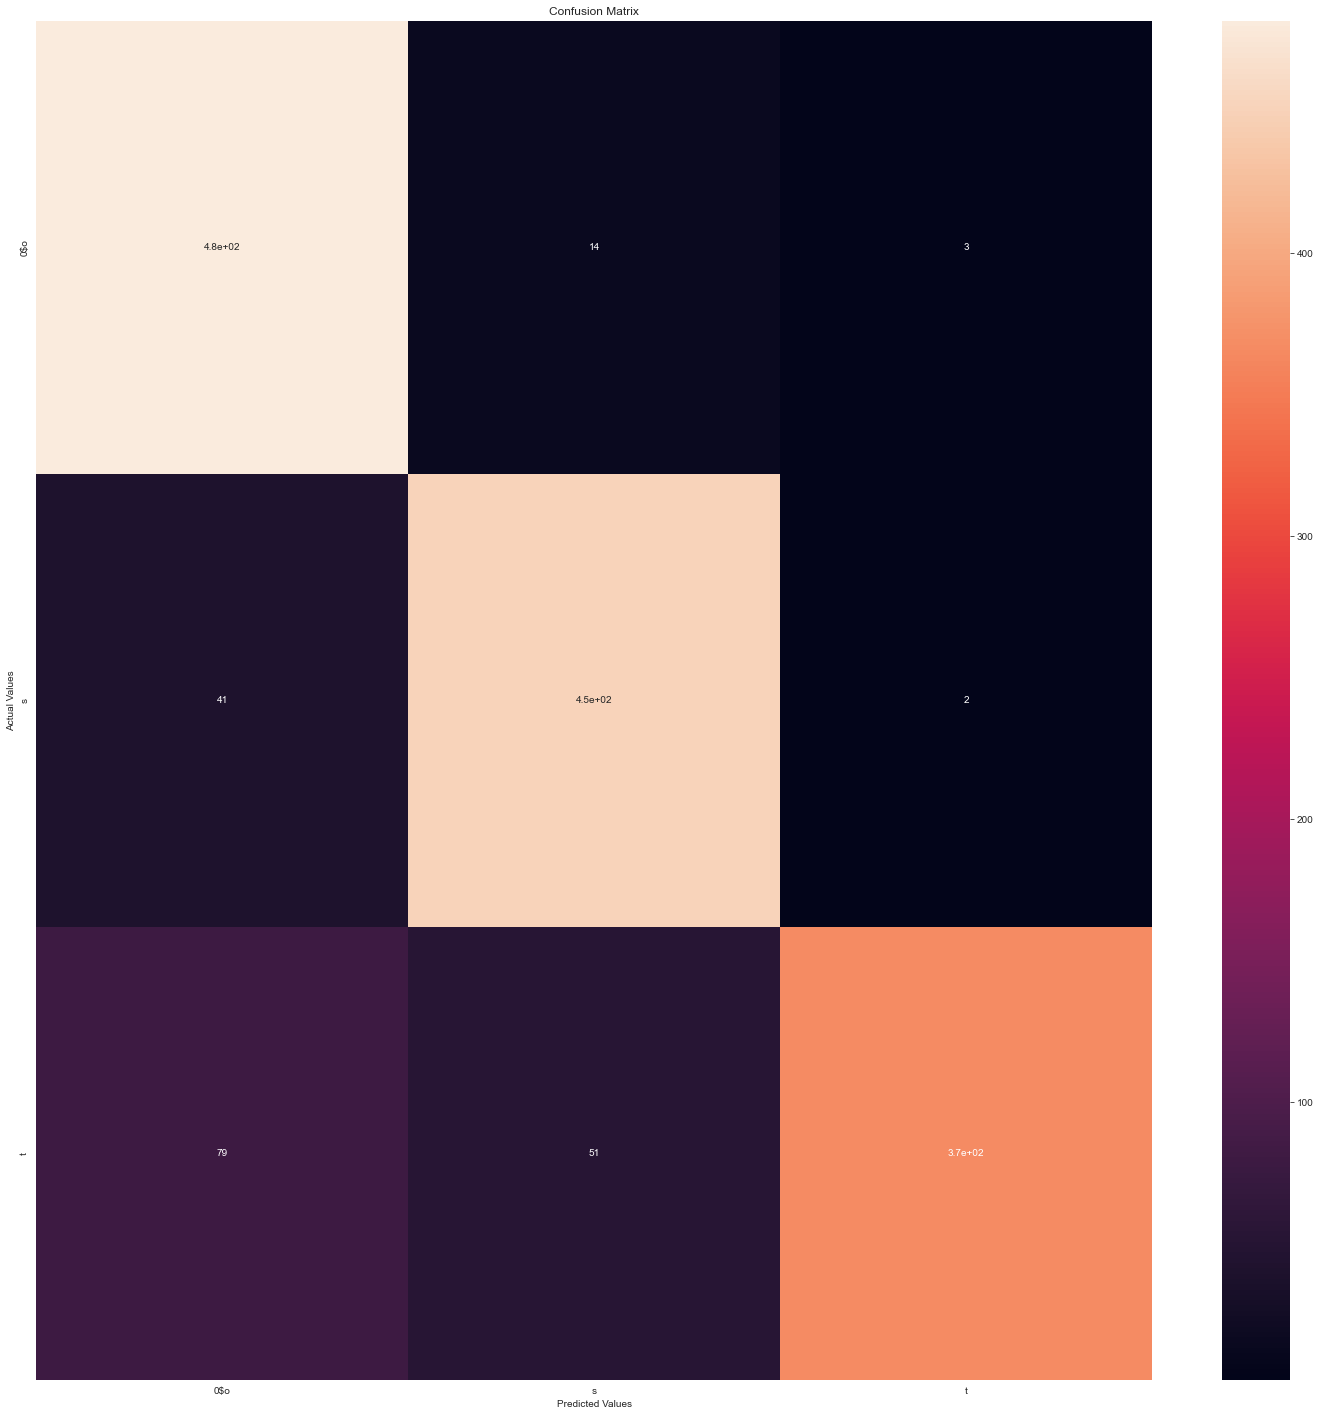

<Figure size 432x288 with 0 Axes>

In [45]:
import seaborn as sns

plt.figure(figsize=(25,25))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("confusion_matrix.png")

In [30]:
in_test_zero = [0 for _ in range(3)]
good_pred_zero = [0 for _ in range(3)]

In [31]:
for x in range(len(y_test_int_zero)):
    in_test_zero[y_test_int_zero[x]] += 1
    if y_test_int_zero[x] == y_pred_int_zero[x]:
        good_pred_zero[y_test_int_zero[x]] += 1

In [32]:
name = ["0&o", "s", "t"]

In [33]:
in_pred_zero = [0 for _ in range(3)]
true_pred_zero = [0 for _ in range(3)]
for x in range(len(y_pred_int_zero)):
    in_pred_zero[y_pred_int_zero[x]] += 1
    if y_test_int_zero[x] == y_pred_int_zero[x]:
        true_pred_zero[y_test_int_zero[x]] += 1

In [34]:
for x in range(len(good_pred_zero)):
    print(name[x]+":", end = "")
    if in_test_zero[x] == 0:
        print(" 0.0 % ||", end="")
    else:
        print("", good_pred_zero[x]/in_test_zero[x]*100, "% ||", end="")

    if in_pred_zero[x] == 0:
        print(" 0.0 %")
    else:
        print("", true_pred_zero[x]/in_pred_zero[x]*100, "%")

0&o: 71.5430861723447 % || 89.92443324937027 %
s: 91.54929577464789 % || 89.74358974358975 %
t: 89.31451612903226 % || 75.34013605442176 %
